# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
# make 'days of birth' into 'age'
app_train['AGE'] = app_train['DAYS_BIRTH']/365
app_train['AGE'].head()

0    25.920548
1    45.931507
2    52.180822
3    52.068493
4    54.608219
Name: AGE, dtype: float64

In [6]:
# 新增欄位對年齡做等寬劃分
app_train['AGE_GROUP'] = pd.cut(app_train['AGE'], 10)
app_train['AGE_GROUP'].value_counts()

(35.099, 39.959]    41758
(39.959, 44.819]    40350
(30.238, 35.099]    38430
(44.819, 49.679]    34311
(49.679, 54.54]     33544
(25.378, 30.238]    33127
(54.54, 59.4]       32650
(59.4, 64.26]       27685
(20.469, 25.378]    13679
(64.26, 69.121]     11977
Name: AGE_GROUP, dtype: int64

In [7]:
# 上面試分組看來，10組大約是每5年一組，最小年紀20.469最大69.121
# 就用 20～70 分10組（可參考Day_016_HW）
bin_cut = np.linspace(20, 70, num=11)
app_train['AGE_BINNED'] = pd.cut(app_train['AGE'], bins = bin_cut) 
app_train['AGE_BINNED'].value_counts()

(35.0, 40.0]    42868
(40.0, 45.0]    41406
(30.0, 35.0]    39440
(45.0, 50.0]    35135
(50.0, 55.0]    34942
(55.0, 60.0]    33120
(25.0, 30.0]    32862
(60.0, 65.0]    27476
(20.0, 25.0]    12159
(65.0, 70.0]     8103
Name: AGE_BINNED, dtype: int64

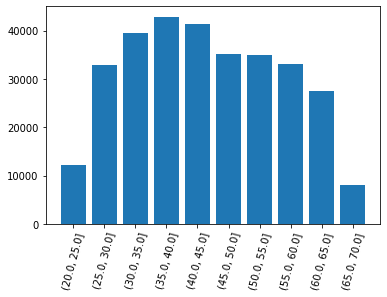

In [8]:
# visualize the basic barchart
groups = app_train['AGE_BINNED'].value_counts()
groups = groups.sort_index()
bar = groups.index
y_pos = np.arange(len(bar))

plt.bar(y_pos, groups)
plt.xticks(rotation = 75)
plt.xticks(y_pos, bar)
plt.show()

In [9]:
app_train.groupby('AGE_BINNED')['AMT_INCOME_TOTAL'].mean()

AGE_BINNED
(20.0, 25.0]    145349.196965
(25.0, 30.0]    164764.078910
(30.0, 35.0]    178096.685310
(35.0, 40.0]    179617.542456
(40.0, 45.0]    181633.860249
(45.0, 50.0]    179306.475713
(50.0, 55.0]    171307.989238
(55.0, 60.0]    158608.647408
(60.0, 65.0]    144782.885738
(65.0, 70.0]    118941.066642
Name: AMT_INCOME_TOTAL, dtype: float64

In [10]:
app_train.groupby('AGE_BINNED')['AMT_INCOME_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
AGE_BINNED,,,,,,,,
"(20.0, 25.0]",12159.0,145349.196965,69360.017689,27000.0,105750.0,135000.0,180000.0,2025000.0
"(25.0, 30.0]",32862.0,164764.078910,94937.960127,27000.0,112500.0,144000.0,202500.0,4500000.0
"(30.0, 35.0]",39440.0,178096.685310,596359.510862,27000.0,112500.0,157500.0,211500.0,117000000.0
"(35.0, 40.0]",42868.0,179617.542456,124147.056479,27000.0,112500.0,157500.0,225000.0,13500000.0
"(40.0, 45.0]",41406.0,181633.860249,144368.658906,26550.0,112500.0,157500.0,225000.0,18000090.0
"(45.0, 50.0]",35135.0,179306.475713,103748.321460,25650.0,112500.0,157500.0,225000.0,2250000.0
"(50.0, 55.0]",34942.0,171307.989238,113443.519500,27000.0,112500.0,157500.0,202500.0,6750000.0
"(55.0, 60.0]",33120.0,158608.647408,92119.584069,25650.0,99000.0,135000.0,202500.0,2250000.0
"(60.0, 65.0]",27476.0,144782.885738,81715.949993,27000.0,90000.0,135000.0,180000.0,2250000.0


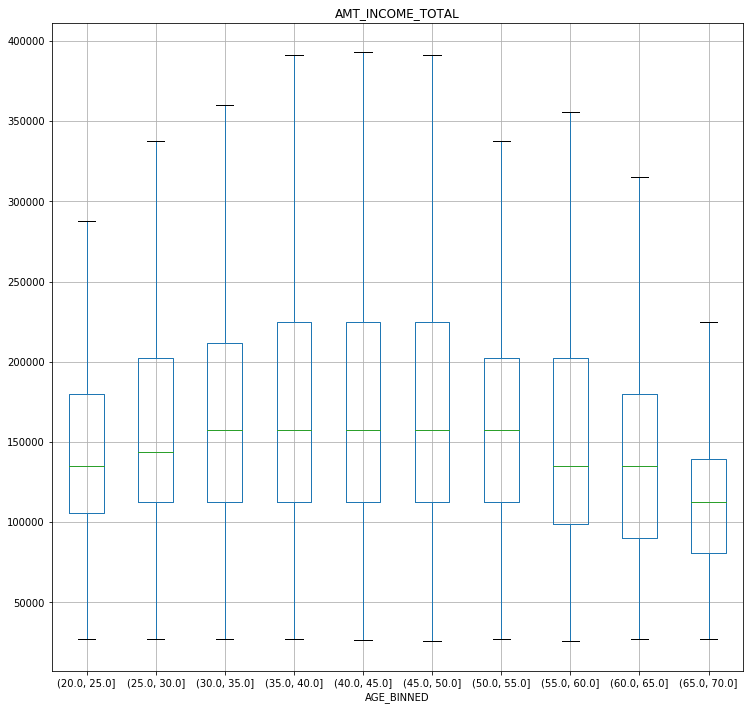

In [11]:
# trying to show the details of income for different ages
# referenced from Day_017_HW
app_train.boxplot(column='AMT_INCOME_TOTAL', by='AGE_BINNED', showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

In [12]:
# 等頻劃分總收入
app_train['INCOME_GROUP'] = pd.qcut(app_train['AMT_INCOME_TOTAL'], 10)
print(app_train['INCOME_GROUP'].value_counts())
np.sort(app_train['INCOME_GROUP'].unique())

(112500.0, 135000.0]       48849
(180000.0, 225000.0]       44809
(99000.0, 112500.0]        36907
(25649.999, 81000.0]       33391
(147150.0, 162000.0]       31120
(162000.0, 180000.0]       30704
(81000.0, 99000.0]         30280
(270000.0, 117000000.0]    27161
(225000.0, 270000.0]       19957
(135000.0, 147150.0]        4333
Name: INCOME_GROUP, dtype: int64


array([Interval(25649.999, 81000.0, closed='right'),
       Interval(81000.0, 99000.0, closed='right'),
       Interval(99000.0, 112500.0, closed='right'),
       Interval(112500.0, 135000.0, closed='right'),
       Interval(135000.0, 147150.0, closed='right'),
       Interval(147150.0, 162000.0, closed='right'),
       Interval(162000.0, 180000.0, closed='right'),
       Interval(180000.0, 225000.0, closed='right'),
       Interval(225000.0, 270000.0, closed='right'),
       Interval(270000.0, 117000000.0, closed='right')], dtype=object)

In [13]:
app_train.groupby('INCOME_GROUP')['AGE'].describe()

,count,mean,std,min,25%,50%,75%,max
INCOME_GROUP,,,,,,,,
"(25649.999, 81000.0]",33391.0,47.631814,13.113991,21.035616,36.460274,49.191781,59.372603,69.043836
"(81000.0, 99000.0]",30280.0,44.909599,12.820469,21.021918,33.819178,44.375342,56.194521,69.027397
"(99000.0, 112500.0]",36907.0,43.699798,12.524263,20.517808,32.976712,42.912329,54.320548,69.032877
"(112500.0, 135000.0]",48849.0,43.444954,12.119123,21.060274,33.191781,42.526027,53.654795,69.019178
"(135000.0, 147150.0]",4333.0,44.818906,12.459402,21.052055,34.257534,44.698630,56.063014,68.975342
"(147150.0, 162000.0]",31120.0,43.149775,11.829861,21.041096,33.246575,42.230137,52.917808,69.005479
"(162000.0, 180000.0]",30704.0,42.953898,11.395086,21.030137,33.602055,41.980822,52.151370,69.043836
"(180000.0, 225000.0]",44809.0,43.168962,11.101819,21.041096,34.109589,42.446575,52.032877,69.041096
"(225000.0, 270000.0]",19957.0,43.141980,10.776000,21.038356,34.504110,42.328767,51.616438,68.997260


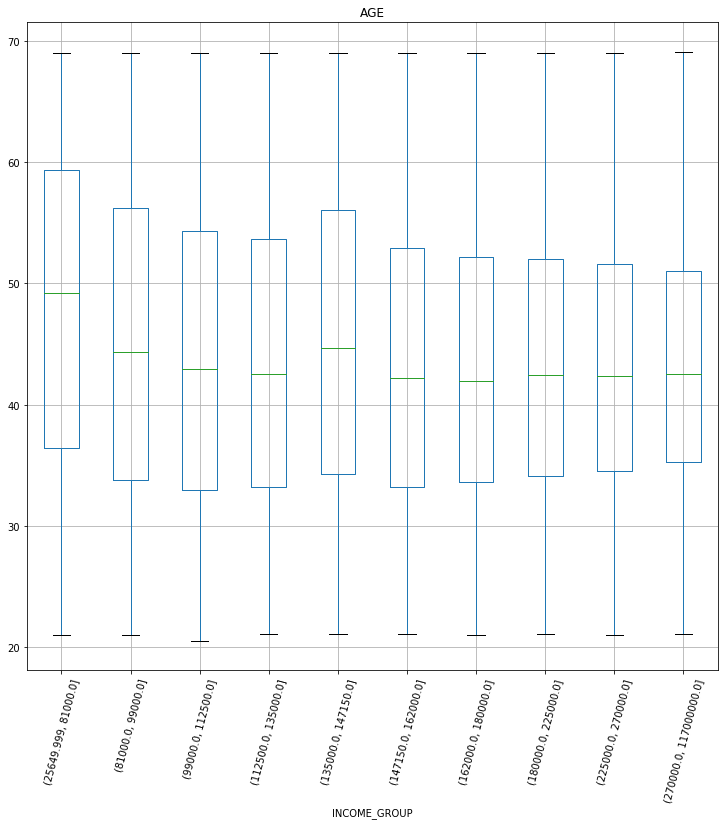

In [14]:
# trying to show the details of age distribution for different income group
# referenced from Day_017_HW
app_train.boxplot(column='AGE', by='INCOME_GROUP', showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.xticks(rotation = 75)
plt.show()

In [15]:
# trying KDE plot with income group
# reference to Day_016_HW
income_data = app_train[['AGE', 'AMT_INCOME_TOTAL', 'INCOME_GROUP']] # subset
income_data.head()

,AGE,AMT_INCOME_TOTAL,INCOME_GROUP
0,25.920548,202500.0,"(180000.0, 225000.0]"
1,45.931507,270000.0,"(225000.0, 270000.0]"
2,52.180822,67500.0,"(25649.999, 81000.0]"
3,52.068493,135000.0,"(112500.0, 135000.0]"
4,54.608219,121500.0,"(112500.0, 135000.0]"


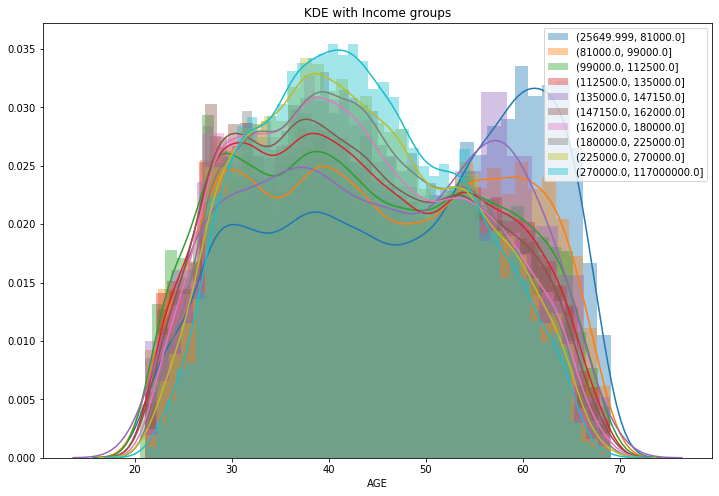

In [16]:
import seaborn as sns

income_group_sorted = np.sort(app_train['INCOME_GROUP'].unique())
plt.figure(figsize=(12,8))
for i in range(len(income_group_sorted)):
    sns.distplot(income_data.loc[(income_data['INCOME_GROUP'] == income_group_sorted[i]), 'AGE'], label=str(income_group_sorted[i]))
plt.title('KDE with Income groups')
plt.legend(loc='best')
plt.show()